In [1]:
import nibabel as nib
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [8]:
p = !pwd

In [20]:
DATA_DIR = Path(str(p[0])).resolve().parent / 'data'

In [2]:
def load_image(path):
    return nib.load(path)

def get_TR(img):
    return img.header.get_zooms()[-1]

def get_slices(img):
    return img.shape[2]
  
def get_header(img):
    return(img.header)

In [48]:
path = DATA_DIR / 'sub-10228/anat/sub-10228_T1w.nii.gz'

In [49]:
img = load_image(path)

In [50]:
header = get_header(img)

In [51]:
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 176 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       1.000004 1.       1.       2.53     1.       1.       1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer May 13 2013'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.03402734
quatern_d       : 0.0
qoffset_x       : -94.67775
qoffset_y      

In [52]:
imgdata = img.get_fdata()

In [53]:
imgdata.shape

(176, 256, 256)

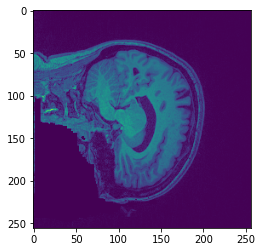

In [54]:
plt.imshow(imgdata[100])

In [33]:
TR = get_TR(img)
slices = get_slices(img)

print('TR: {}'.format(TR))
print('# of slices: {}'.format(slices))

TR: 1.0
# of slices: 256


In [59]:
img_sub_10388=load_image(DATA_DIR/'sub-10388/func/sub-10388_task-rest_bold.nii.gz')
img_sub_10228=load_image(DATA_DIR/'sub-10228/func/sub-10228_task-rest_bold.nii.gz')

In [80]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting, image
from nilearn import datasets
from nilearn.regions import RegionExtractor

In [64]:
correlation_measure = ConnectivityMeasure(kind='correlation')
## craete masker based on the atlas 
## and create a time series of the uploaded image using the masker
def create_mask(atlas_img, fmri_img):
  # generates a mask given img and atlas
  masker=NiftiLabelsMasker(labels_img=atlas_img, standardize=True)
  time_series=masker.fit_transform(fmri_img)
  
  return time_series

# using the correlation measures defined above, 
# we calculate the correaltion matrixes
def calc_correlation_matrix(time_series):
  # given a time series, return a correlation matrix
  return correlation_measure.fit_transform([time_series])[0]

#and we plot,
def plot_cor_matrix(correlation_matrix, title):
  ## plot the correlation matrix

  np.fill_diagonal(correlation_matrix, 0)
  plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                       vmax=0.8, vmin=-0.8, reorder=True)
  plt.title(title)
  plt.show()

In [68]:
harvard_dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')


Dataset created in /Users/dominika/nilearn_data/fsl



Downloaded 20602880 of 25716861 bytes (80.1%,    0.5s remaining) ...done. (3 seconds, 0 min)
Extracting data from /Users/dominika/nilearn_data/fsl/245b1ae3f43e3ea47e2ed9f438694f4a/HarvardOxford.tgz..... done.


In [69]:
harvard_maps = harvard_dataset.maps
harvard_labels = harvard_dataset.labels

In [77]:
smith_atlas = datasets.fetch_atlas_smith_2009()
smith_atlas_rs_networks = smith_atlas.rsn10


Dataset created in /Users/dominika/nilearn_data/smith_2009



Downloaded 9674752 of 15129514 bytes (63.9%,    1.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 5791744 of 7565016 bytes (76.6%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 51863552 of 53028809 bytes (97.8%,    0.2s remaining) ...done. (8 seconds, 0 min)


Downloaded 13262848 of 19114114 bytes (69.4%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 6152192 of 9566632 bytes (64.3%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 62398464 of 67017538 bytes (93.1%,    0.8s remaining) ...done. (12 seconds, 0 min)


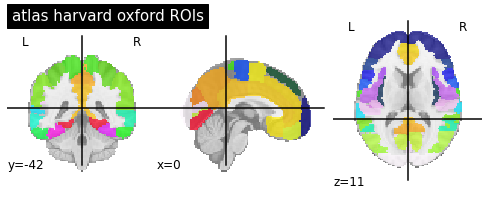

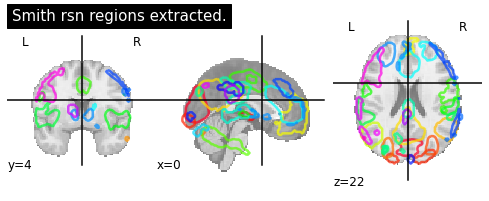

In [79]:
plotting.plot_roi(harvard_maps, title='atlas harvard oxford ROIs')

#For the Smith's atlas, we need to extract the regions from the nifti object
extraction = RegionExtractor(smith_atlas_rs_networks, min_region_size=800,
                             threshold=98, thresholding_strategy='percentile')
extraction.fit()
smith_maps = extraction.regions_img_

#and to plot
plotting.plot_prob_atlas(smith_maps, title="Smith rsn regions extracted.")

In [81]:
img=img_sub_10228 


# Smith
# We take the first out of the 10 rsns
smith_1st_rsn=image.index_img(smith_atlas_rs_networks, 0)

smith_time_series=create_mask(smith_1st_rsn, img)
smith_cor_matrix=calc_correlation_matrix(smith_time_series)
plot_cor_matrix(smith_cor_matrix, 'smith correlation matrix')

# Harvard Oxford
harvard_oxford_time_series=create_mask(harvard_maps, img)
harvard_oxford_cor_matrix=calc_correlation_matrix(harvard_oxford_time_series) 
plot_cor_matrix(harvard_oxford_cor_matrix, 'harvard oxford correlation matrix')


In [1]:
plot_cor_matrix(harvard_oxford_cor_matrix, 'harvard oxford correlation matrix')

NameError: name 'plot_cor_matrix' is not defined